# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Loading the Data

In [2]:
dataset=pd.read_csv("/content/pizzaplacedata.csv")

# Analysis of dataset

In [3]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price
0,1,2015-000001,01/01/2015,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,01/01/2015,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,01/01/2015,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,01/01/2015,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,01/01/2015,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,31/12/2015,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-021348,31/12/2015,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-021348,31/12/2015,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-021349,31/12/2015,22:09:54,mexicana,L,veggie,20.25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49574 non-null  int64  
 1   id          49574 non-null  object 
 2   date        49569 non-null  object 
 3   time        49573 non-null  object 
 4   name        49573 non-null  object 
 5   size        49573 non-null  object 
 6   type        49574 non-null  object 
 7   price       49573 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.0+ MB


In [5]:
dataset.describe()

,Unnamed: 0,price
count,49574.000000,49573.000000
mean,24787.500000,16.497762
std,14310.925459,3.621990
min,1.000000,9.750000
25%,12394.250000,12.750000
50%,24787.500000,16.500000
75%,37180.750000,20.250000
max,49574.000000,35.950000


# Data Cleaning and Preprocessing

## Removing the NULL values

In [6]:
dataset.isna().sum()

Unnamed: 0    0
id            0
date          5
time          1
name          1
size          1
type          0
price         1
dtype: int64

### Adding the data in the NULL cells using bfill and ffill

In [7]:
dataset["date"]=dataset["date"].fillna(method="bfill")

In [8]:
dataset["time"]=dataset["time"].fillna(method="ffill")

### Deleting the rows of NULL entries

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49571 entries, 0 to 49573
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  49571 non-null  int64  
 1   id          49571 non-null  object 
 2   date        49571 non-null  object 
 3   time        49571 non-null  object 
 4   name        49571 non-null  object 
 5   size        49571 non-null  object 
 6   type        49571 non-null  object 
 7   price       49571 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.4+ MB


## Conversion of categorical data to numerical data

In [11]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price
0,1,2015-000001,01/01/2015,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,01/01/2015,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,01/01/2015,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,01/01/2015,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,01/01/2015,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,31/12/2015,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-021348,31/12/2015,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-021348,31/12/2015,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-021349,31/12/2015,22:09:54,mexicana,L,veggie,20.25


In [12]:
dataset["name"].unique()

array(['hawaiian', 'classic_dlx', 'mexicana', 'thai_ckn', 'five_cheese',
       'ital_supr', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'spin_pesto', 'spicy_ital', 'ital_cpcllo', 'veggie_veg',
       'green_garden', 'southw_ckn', 'pepperoni', 'cali_ckn', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'mediterraneo', 'spinach_fet', 'ital_veggie', 'calabrese',
       'peppr_salami', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [13]:
dataset["type"].unique()

array(['classic', 'veggie', 'chicken', 'supreme'], dtype=object)

In [14]:
dataset["size"].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

### By using Manual Mapping

In [15]:
size_map={"S":0,"M":1,"L":2,"XL":3,"XXL":4}
dataset["size"]=dataset["size"].map(size_map)

In [16]:
type_map={"classic":0,"veggie":1,"chicken":2,"supreme":3}
dataset["type"]=dataset["type"].map(type_map)

In [17]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price
0,1,2015-000001,01/01/2015,11:38:36,hawaiian,1,0,13.25
1,2,2015-000002,01/01/2015,11:57:40,classic_dlx,1,0,16.00
2,3,2015-000002,01/01/2015,11:57:40,mexicana,1,1,16.00
3,4,2015-000002,01/01/2015,11:57:40,thai_ckn,2,2,20.75
4,5,2015-000002,01/01/2015,11:57:40,five_cheese,2,1,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,31/12/2015,21:23:10,four_cheese,2,1,17.95
49570,49571,2015-021348,31/12/2015,21:23:10,napolitana,0,0,12.00
49571,49572,2015-021348,31/12/2015,21:23:10,ckn_alfredo,1,2,16.75
49572,49573,2015-021349,31/12/2015,22:09:54,mexicana,2,1,20.25


### By using Dummies

In [18]:
temp_data=pd.get_dummies(dataset["name"])

In [19]:
temp_data

,bbq_ckn,big_meat,brie_carre,calabrese,cali_ckn,ckn_alfredo,ckn_pesto,classic_dlx,five_cheese,four_cheese,...,sicilian,soppressata,southw_ckn,spicy_ital,spin_pesto,spinach_fet,spinach_supr,thai_ckn,the_greek,veggie_veg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49569,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49571,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
dataset=pd.concat([dataset,temp_data],axis=1)

In [21]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,sicilian,soppressata,southw_ckn,spicy_ital,spin_pesto,spinach_fet,spinach_supr,thai_ckn,the_greek,veggie_veg
0,1,2015-000001,01/01/2015,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-000002,01/01/2015,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2015-000002,01/01/2015,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2015-000002,01/01/2015,11:57:40,thai_ckn,2,2,20.75,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2015-000002,01/01/2015,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,31/12/2015,21:23:10,four_cheese,2,1,17.95,0,0,...,0,0,0,0,0,0,0,0,0,0
49570,49571,2015-021348,31/12/2015,21:23:10,napolitana,0,0,12.00,0,0,...,0,0,0,0,0,0,0,0,0,0
49571,49572,2015-021348,31/12/2015,21:23:10,ckn_alfredo,1,2,16.75,0,0,...,0,0,0,0,0,0,0,0,0,0
49572,49573,2015-021349,31/12/2015,22:09:54,mexicana,2,1,20.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dataset.isna().sum()

Unnamed: 0      0
id              0
date            0
time            0
name            0
size            0
type            0
price           0
bbq_ckn         0
big_meat        0
brie_carre      0
calabrese       0
cali_ckn        0
ckn_alfredo     0
ckn_pesto       0
classic_dlx     0
five_cheese     0
four_cheese     0
green_garden    0
hawaiian        0
ital_cpcllo     0
ital_supr       0
ital_veggie     0
mediterraneo    0
mexicana        0
napolitana      0
pep_msh_pep     0
pepperoni       0
peppr_salami    0
prsc_argla      0
sicilian        0
soppressata     0
southw_ckn      0
spicy_ital      0
spin_pesto      0
spinach_fet     0
spinach_supr    0
thai_ckn        0
the_greek       0
veggie_veg      0
dtype: int64

## Scaling the data

# Selection of Features and Target

In [23]:
dataset.corr()

<ipython-input-23-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,size,type,price,bbq_ckn,big_meat,brie_carre,calabrese,cali_ckn,ckn_alfredo,...,sicilian,soppressata,southw_ckn,spicy_ital,spin_pesto,spinach_fet,spinach_supr,thai_ckn,the_greek,veggie_veg
Unnamed: 0,1.000000,-0.004136,-0.001597,-0.003354,-0.007404,0.004566,0.000497,0.002906,0.002084,0.000381,...,0.001136,-0.002341,0.003672,0.000515,0.002944,-0.004704,-0.004274,0.006829,-0.001059,-0.005931
size,-0.004136,1.000000,0.075825,0.884251,0.025103,-0.265545,-0.132395,0.012047,0.017237,-0.003826,...,-0.044797,0.000991,0.053051,0.059431,-0.040184,-0.022985,-0.039667,0.073572,0.140165,-0.029642
type,-0.001597,0.075825,1.000000,0.290571,0.117154,-0.244785,0.138326,0.192159,0.115575,0.073515,...,0.279244,0.194653,0.103449,0.278193,-0.049847,-0.061161,0.193513,0.115601,-0.209682,-0.062882
price,-0.003354,0.884251,0.290571,1.000000,0.068215,-0.248866,0.197307,0.019462,0.060295,0.024598,...,-0.029661,0.023082,0.088958,0.089091,-0.016360,-0.019346,-0.016052,0.112696,0.168067,-0.025823
bbq_ckn,-0.007404,0.025103,0.117154,0.068215,1.000000,-0.045520,-0.022695,-0.031528,-0.050897,-0.032375,...,-0.045816,-0.031937,-0.045557,-0.045643,-0.032089,-0.039372,-0.031750,-0.050908,-0.038992,-0.040480
big_meat,0.004566,-0.265545,-0.244785,-0.248866,-0.045520,1.000000,-0.020024,-0.027817,-0.044906,-0.028564,...,-0.040423,-0.028178,-0.040195,-0.040271,-0.028312,-0.034738,-0.028013,-0.044916,-0.034403,-0.035716
brie_carre,0.000497,-0.132395,0.138326,0.197307,-0.022695,-0.020024,1.000000,-0.013869,-0.022389,-0.014241,...,-0.020154,-0.014049,-0.020040,-0.020078,-0.014116,-0.017320,-0.013967,-0.022394,-0.017152,-0.017807
calabrese,0.002906,0.012047,0.192159,0.019462,-0.031528,-0.027817,-0.013869,1.000000,-0.031103,-0.019784,...,-0.027998,-0.019516,-0.027839,-0.027892,-0.019609,-0.024060,-0.019402,-0.031110,-0.023828,-0.024737
cali_ckn,0.002084,0.017237,0.115575,0.060295,-0.050897,-0.044906,-0.022389,-0.031103,1.000000,-0.031938,...,-0.045198,-0.031506,-0.044943,-0.045028,-0.031656,-0.038842,-0.031322,-0.050222,-0.038466,-0.039935
ckn_alfredo,0.000381,-0.003826,0.073515,0.024598,-0.032375,-0.028564,-0.014241,-0.019784,-0.031938,1.000000,...,-0.028750,-0.020041,-0.028587,-0.028642,-0.020136,-0.024706,-0.019923,-0.031945,-0.024468,-0.025402


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49571 entries, 0 to 49573
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    49571 non-null  int64  
 1   id            49571 non-null  object 
 2   date          49571 non-null  object 
 3   time          49571 non-null  object 
 4   name          49571 non-null  object 
 5   size          49571 non-null  int64  
 6   type          49571 non-null  int64  
 7   price         49571 non-null  float64
 8   bbq_ckn       49571 non-null  uint8  
 9   big_meat      49571 non-null  uint8  
 10  brie_carre    49571 non-null  uint8  
 11  calabrese     49571 non-null  uint8  
 12  cali_ckn      49571 non-null  uint8  
 13  ckn_alfredo   49571 non-null  uint8  
 14  ckn_pesto     49571 non-null  uint8  
 15  classic_dlx   49571 non-null  uint8  
 16  five_cheese   49571 non-null  uint8  
 17  four_cheese   49571 non-null  uint8  
 18  green_garden  49571 non-nu

In [25]:
X_index=[5,6]
for i in range(8,40):
  X_index.append(i)
X=dataset.iloc[:,X_index].values
y=dataset.iloc[:,7].values

In [26]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 2, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0]])

# Spliting the Dataset

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2,stratify=y)

In [29]:
X_train

array([[2, 1, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 3, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

# Training and Testing

## Multiple Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr_obj=LinearRegression()

In [32]:
lr_obj.fit(X_train,y_train)

LinearRegression()

In [33]:
lr_pred=lr_obj.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,r2_score

In [35]:
print(r2_score(y_test,lr_pred))

0.9883270044164854


## DecisionTree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
dtr_obj=DecisionTreeRegressor()

In [38]:
dtr_obj.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
dtr_pred=dtr_obj.predict(X_test)

In [40]:
print(r2_score(y_test,dtr_pred))

1.0


## RandomTree Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr_obj=RandomForestRegressor()


In [43]:
rfr_obj.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
rfr_pred=rfr_obj.predict(X_test)

In [45]:
print(r2_score(y_test,lr_pred))

0.9883270044164854


# Visualization of Pizza Sales by graphs

In [46]:
dataset.head()

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,sicilian,soppressata,southw_ckn,spicy_ital,spin_pesto,spinach_fet,spinach_supr,thai_ckn,the_greek,veggie_veg
0,1,2015-000001,01/01/2015,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-000002,01/01/2015,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2015-000002,01/01/2015,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2015-000002,01/01/2015,11:57:40,thai_ckn,2,2,20.75,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2015-000002,01/01/2015,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dataset["date"]=pd.to_datetime(dataset["date"])

<ipython-input-47-46535f7d3f11>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset["date"]=pd.to_datetime(dataset["date"])


In [48]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,sicilian,soppressata,southw_ckn,spicy_ital,spin_pesto,spinach_fet,spinach_supr,thai_ckn,the_greek,veggie_veg
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2015-000002,2015-01-01,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,2,2,20.75,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,2,1,17.95,0,0,...,0,0,0,0,0,0,0,0,0,0
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,0,0,12.00,0,0,...,0,0,0,0,0,0,0,0,0,0
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,1,2,16.75,0,0,...,0,0,0,0,0,0,0,0,0,0
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,2,1,20.25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dataset["month"]=dataset["date"].dt.month

In [50]:
dataset["month"]

0         1
1         1
2         1
3         1
4         1
         ..
49569    12
49570    12
49571    12
49572    12
49573    12
Name: month, Length: 49571, dtype: int64

In [51]:
dataset["day_of_month"]=dataset["date"].dt.day

In [52]:
dataset["day_of_month"]

0         1
1         1
2         1
3         1
4         1
         ..
49569    31
49570    31
49571    31
49572    31
49573    31
Name: day_of_month, Length: 49571, dtype: int64

In [53]:
dataset[['Hour', 'Minute', 'Second']] = dataset['time'].str.split(':', expand=True)

In [54]:
dataset["new_time"]=round(dataset["Hour"].astype(int)+(dataset["Minute"].astype(int)/60))

In [55]:
dataset["new_time"]

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
49569    21.0
49570    21.0
49571    21.0
49572    22.0
49573    23.0
Name: new_time, Length: 49571, dtype: float64

In [56]:
import matplotlib.pyplot as plt


In [57]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,spinach_supr,thai_ckn,the_greek,veggie_veg,month,day_of_month,Hour,Minute,Second,new_time
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,0,1,1,11,38,36,12.0
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,0,1,1,11,57,40,12.0
2,3,2015-000002,2015-01-01,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,0,1,1,11,57,40,12.0
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,2,2,20.75,0,0,...,0,1,0,0,1,1,11,57,40,12.0
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,0,1,1,11,57,40,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,2,1,17.95,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,0,0,12.00,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,1,2,16.75,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,2,1,20.25,0,0,...,0,0,0,0,12,31,22,09,54,22.0


In [58]:
item_monthly_count=[]


name_arr=dataset["name"].values
month_arr=dataset["month"].values
unique_items=dataset["name"].unique()
for i in unique_items:
  k=0
  temp=[]
  for j in range(0,12):
    count=0
    while k!=len(name_arr) and month_arr[k]==j+1 :
      if name_arr[k] == i :
        count=count+1
      k=k+1
    temp.append(count)
  item_monthly_count.append(temp)



In [59]:
import matplotlib.pyplot as plt

In [60]:
unique_items[0]

'hawaiian'

Text(0.5, 1.0, 'No. of hawaiian orders in a year')

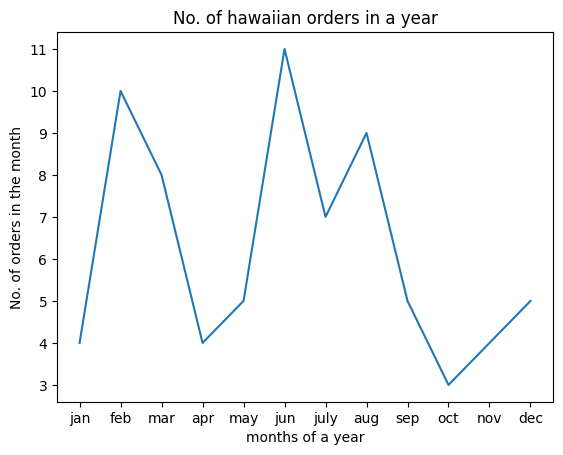

In [61]:
months_of_year=["jan","feb","mar","apr","may","jun","july","aug","sep","oct","nov","dec"]
plt.plot(months_of_year,item_monthly_count[0],label=unique_items[0])
plt.xlabel("months of a year")
plt.ylabel("No. of orders in the month")
plt.title(f"No. of {unique_items[0]} orders in a year")

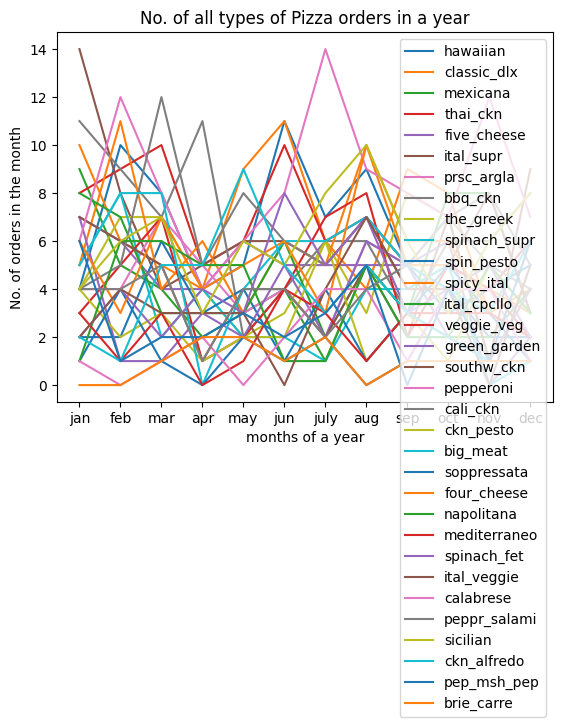

In [62]:
k=0
for i in item_monthly_count:
  plt.plot(months_of_year,i,label=unique_items[k])
  k=k+1
plt.xlabel("months of a year")
plt.ylabel("No. of orders in the month")
plt.title(f"No. of all types of Pizza orders in a year")
plt.legend()

In [63]:
time_orders_dict=sorted(dict(dataset["new_time"].value_counts()).items())
time_orders_count=dict(time_orders_dict).values()
time_orders_count

dict_values([5, 525, 5534, 7052, 4880, 3158, 3651, 4692, 5507, 4904, 4126, 2971, 2123, 443])

In [64]:
time_unique_values=sorted((dataset["new_time"].unique()).astype(int))
time_unique_values

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Text(0.5, 1.0, 'No.of orders w.r.t time(24-Hour format) with whole year data')

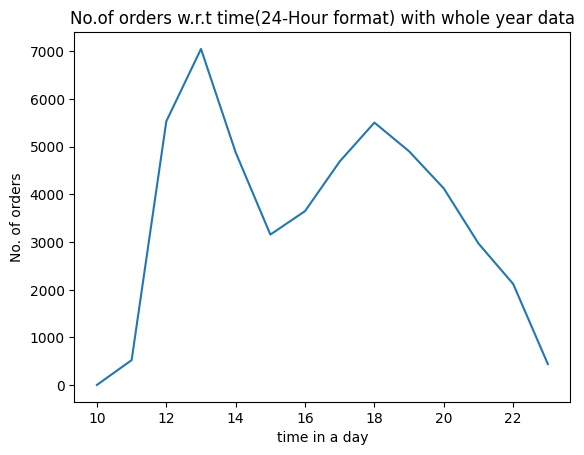

In [65]:
plt.plot(time_unique_values,time_orders_count)
plt.xlabel("time in a day")
plt.ylabel("No. of orders")
plt.title("No.of orders w.r.t time(24-Hour format) with whole year data")

In [66]:
month_unique_values=dict(sorted(dict(dataset["month"].value_counts()).items())).values()

Text(0.5, 1.0, 'No.of orders w.r.t months with whole year data')

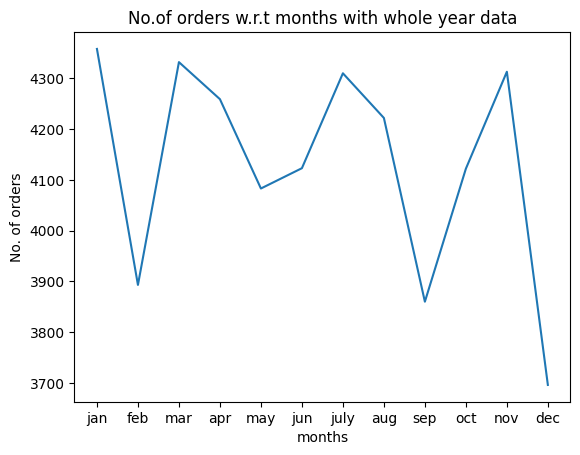

In [67]:
plt.plot(months_of_year,month_unique_values)
plt.xlabel("months")
plt.ylabel("No. of orders")
plt.title("No.of orders w.r.t months with whole year data")

In [68]:
dataset

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,spinach_supr,thai_ckn,the_greek,veggie_veg,month,day_of_month,Hour,Minute,Second,new_time
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,0,1,1,11,38,36,12.0
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,0,1,1,11,57,40,12.0
2,3,2015-000002,2015-01-01,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,0,1,1,11,57,40,12.0
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,2,2,20.75,0,0,...,0,1,0,0,1,1,11,57,40,12.0
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,0,1,1,11,57,40,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,2,1,17.95,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,0,0,12.00,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,1,2,16.75,0,0,...,0,0,0,0,12,31,21,23,10,21.0
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,2,1,20.25,0,0,...,0,0,0,0,12,31,22,09,54,22.0


In [69]:
time_uniques=sorted(dataset["new_time"].unique())

In [70]:
month_uniques=sorted(dataset["month"].unique())

In [71]:
time_arr=dataset["new_time"].values

In [72]:
count=0
time_month_orders=[]
k=0
for i in month_uniques:
  temp=[]
  for j in time_uniques:
    count=0
    while k!=len(time_arr) and month_arr[k]==i and time_arr[k]==j:
      count=count+1
      k=k+1
    temp.append(count)
  time_month_orders.append(temp)

In [73]:
time_month_orders

[[0, 0, 12, 21, 31, 7, 12, 19, 16, 17, 9, 8, 7, 0],
 [0, 0, 29, 9, 12, 17, 5, 3, 30, 22, 14, 10, 12, 2],
 [0, 0, 10, 1, 27, 16, 10, 25, 16, 11, 20, 6, 15, 1],
 [0, 0, 18, 4, 5, 10, 10, 10, 11, 7, 17, 9, 5, 0],
 [0, 4, 7, 9, 24, 8, 7, 12, 22, 8, 13, 6, 5, 0],
 [0, 0, 18, 44, 10, 7, 14, 7, 20, 14, 9, 3, 1, 0],
 [0, 0, 13, 28, 27, 5, 12, 11, 15, 11, 10, 0, 4, 2],
 [0, 4, 36, 36, 14, 6, 11, 10, 24, 12, 11, 4, 5, 0],
 [0, 2, 20, 10, 14, 9, 13, 8, 11, 17, 12, 4, 4, 3],
 [0, 0, 14, 7, 22, 3, 4, 7, 13, 19, 26, 17, 6, 8],
 [0, 0, 18, 8, 22, 4, 5, 19, 12, 9, 12, 7, 0, 0],
 [0, 0, 10, 10, 12, 12, 19, 12, 18, 15, 6, 3, 2, 0]]

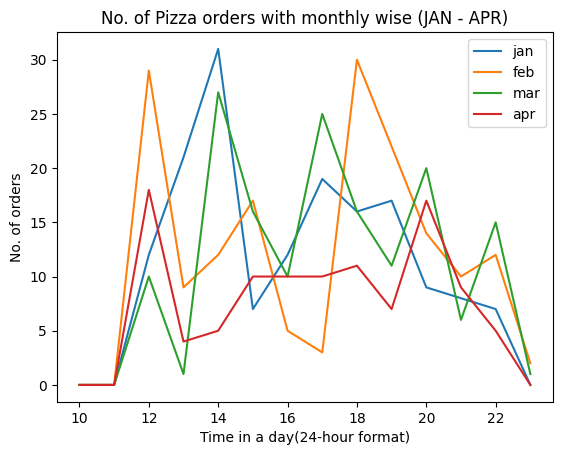

In [74]:
k=0
for i in time_month_orders[:4]:
  plt.plot(time_uniques,i,label=months_of_year[k])
  k=k+1
plt.xlabel("Time in a day(24-hour format)")
plt.ylabel("No. of orders")
plt.title(f"No. of Pizza orders with monthly wise (JAN - APR)")
plt.legend()

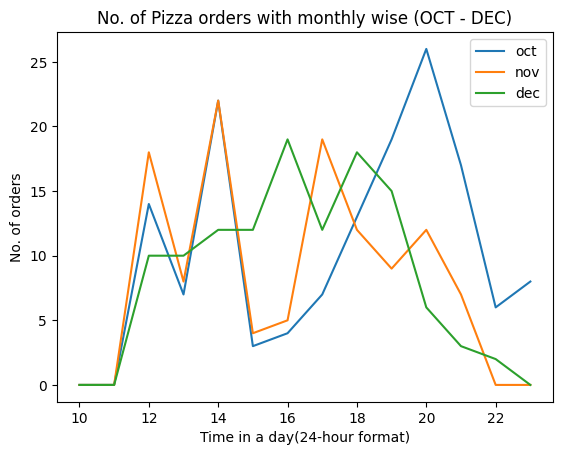

In [75]:
k=9
for i in time_month_orders[9:]:
  plt.plot(time_uniques,i,label=months_of_year[k])
  k=k+1
plt.xlabel("Time in a day(24-hour format)")
plt.ylabel("No. of orders")
plt.title(f"No. of Pizza orders with monthly wise (OCT - DEC)")
plt.legend()

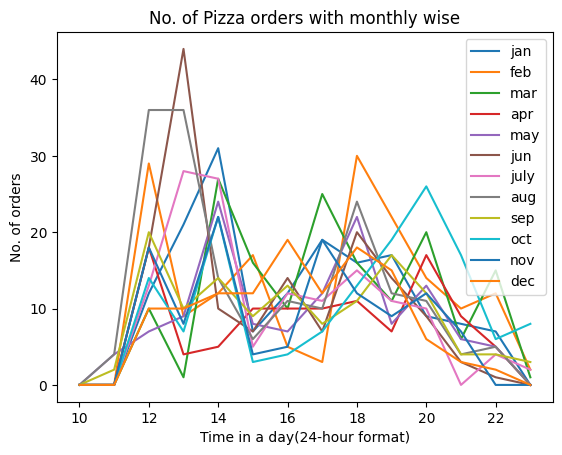

In [76]:
k=0
for i in time_month_orders:
  plt.plot(time_uniques,i,label=months_of_year[k])
  k=k+1
plt.xlabel("Time in a day(24-hour format)")
plt.ylabel("No. of orders")
plt.title(f"No. of Pizza orders with monthly wise")
plt.legend()

In [77]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le_obj=LabelEncoder()
dataset["items_label"]=le_obj.fit_transform(dataset["name"])

In [81]:
dataset.head()

,Unnamed: 0,id,date,time,name,size,type,price,bbq_ckn,big_meat,...,thai_ckn,the_greek,veggie_veg,month,day_of_month,Hour,Minute,Second,new_time,items_label
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,1,0,13.25,0,0,...,0,0,0,1,1,11,38,36,12.0,11
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,1,0,16.00,0,0,...,0,0,0,1,1,11,57,40,12.0,7
2,3,2015-000002,2015-01-01,11:57:40,mexicana,1,1,16.00,0,0,...,0,0,0,1,1,11,57,40,12.0,16
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,2,2,20.75,0,0,...,1,0,0,1,1,11,57,40,12.0,29
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,2,1,18.50,0,0,...,0,0,0,1,1,11,57,40,12.0,8


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49571 entries, 0 to 49573
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    49571 non-null  int64         
 1   id            49571 non-null  object        
 2   date          49571 non-null  datetime64[ns]
 3   time          49571 non-null  object        
 4   name          49571 non-null  object        
 5   size          49571 non-null  int64         
 6   type          49571 non-null  int64         
 7   price         49571 non-null  float64       
 8   bbq_ckn       49571 non-null  uint8         
 9   big_meat      49571 non-null  uint8         
 10  brie_carre    49571 non-null  uint8         
 11  calabrese     49571 non-null  uint8         
 12  cali_ckn      49571 non-null  uint8         
 13  ckn_alfredo   49571 non-null  uint8         
 14  ckn_pesto     49571 non-null  uint8         
 15  classic_dlx   49571 non-null  uint8 

In [101]:
class_X=dataset.iloc[:,[6,46]].values
class_y=dataset["month"].values

In [104]:
class_X

array([[ 0, 11],
       [ 0,  7],
       [ 1, 16],
       ...,
       [ 2,  5],
       [ 1, 16],
       [ 2,  0]])

In [105]:
class_X_train,class_X_test,class_y_train,class_y_test=train_test_split(class_X,class_y,test_size=0.25,stratify=class_y)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
Lr_obj=LogisticRegression()
Lr_obj.fit(class_X_train,class_y_train)
Lr_pred=Lr_obj.predict(class_X_test)

In [108]:
r2_score(class_y_test,Lr_pred)

-1.3818532274090933

In [109]:
from sklearn.metrics import confusion_matrix
confusion_matrix(class_y_test,Lr_pred)

array([[375,   0, 350,   0,   0,   0, 254,   0,   0,   0, 111,   0],
       [320,   0, 324,   0,   0,   0, 222,   0,   0,   0, 107,   0],
       [410,   0, 326,   0,   0,   0, 237,   0,   0,   0, 110,   0],
       [349,   0, 352,   0,   0,   0, 257,   0,   0,   0, 107,   0],
       [343,   0, 348,   0,   0,   0, 215,   0,   0,   0, 115,   0],
       [343,   0, 344,   0,   0,   0, 224,   0,   0,   0, 120,   0],
       [381,   0, 349,   0,   0,   0, 242,   0,   0,   0, 106,   0],
       [358,   0, 372,   0,   0,   0, 219,   0,   0,   0, 106,   0],
       [309,   0, 342,   0,   0,   0, 215,   0,   0,   0,  99,   0],
       [358,   0, 330,   0,   0,   0, 240,   0,   0,   0, 102,   0],
       [366,   0, 336,   0,   0,   0, 247,   0,   0,   0, 129,   0],
       [323,   0, 316,   0,   0,   0, 190,   0,   0,   0,  95,   0]])

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

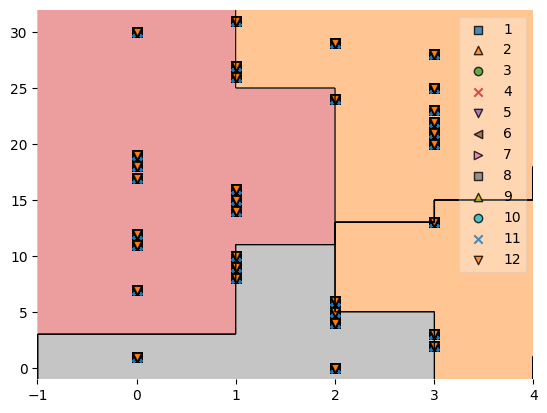

In [111]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(class_X_train,class_y_train,Lr_obj)